In [1]:
import pandas as pd

data = pd.read_csv("duct.csv")

data

,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,...,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,bloodflow2,calcification,birads
0,1,0,32,18.00,167,78,28.0,0,0,0,...,1,3,2,1,2,1,1,1,0,1
1,1,1,42,7.00,156,57,23.4,0,1,1,...,2,1,1,1,1,1,1,1,0,1
2,1,0,61,0.75,163,65,24.5,0,0,0,...,2,3,1,1,2,2,2,3,0,2
3,1,0,39,6.00,160,65,25.4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,69,0.50,156,67,27.5,1,1,0,...,2,1,5,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,55,12.00,154,52,21.9,0,0,0,...,2,3,4,1,1,2,1,1,0,2
351,0,1,47,0.10,155,60,25.0,0,0,0,...,1,2,2,1,1,2,1,1,0,2
352,0,1,47,0.10,155,60,25.0,0,0,0,...,2,2,1,1,1,1,1,1,0,1
353,0,0,40,1.00,163,60,22.6,0,0,0,...,2,1,5,1,1,1,1,1,0,1


In [2]:
data.shape

(355, 46)

In [3]:
from pycaret.clustering import *
exp_clu101 = setup(data, normalize = True)


Setup Succesfully Completed!


,Description,Value
0,session_id,4220
1,Original Data,"(355, 46)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,41
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(355, 150)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [16]:
kmeans = create_model('kmeans', num_clusters = 4)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4220, tol=0.0001, verbose=0)


In [17]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,...,ussize,usposition,usdistance,usshape,usboundary,bloodflow,bloodflow2,calcification,birads,Cluster
0,1,0,32,18.00,167,78,28.0,0,0,0,...,3,2,1,2,1,1,1,0,1,Cluster 2
1,1,1,42,7.00,156,57,23.4,0,1,1,...,1,1,1,1,1,1,1,0,1,Cluster 3
2,1,0,61,0.75,163,65,24.5,0,0,0,...,3,1,1,2,2,2,3,0,2,Cluster 0
3,1,0,39,6.00,160,65,25.4,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 1
4,1,0,69,0.50,156,67,27.5,1,1,0,...,1,5,1,1,1,1,1,0,2,Cluster 2


In [18]:
plot_model(kmeans)

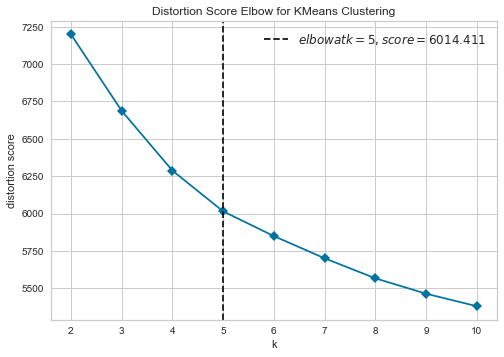

In [19]:
plot_model(kmeans, plot = 'elbow')

In [20]:
# kmean_results.to_csv('kmeans.csv')

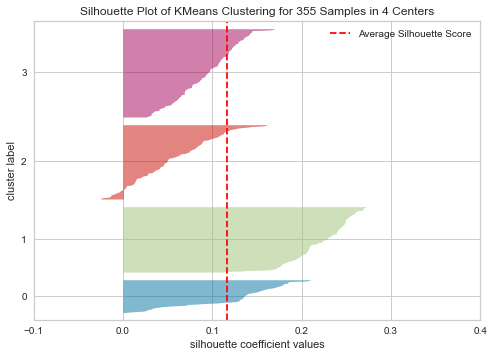

In [21]:
plot_model(kmeans, plot = 'silhouette')